In [2]:
import pandas as pd
import matplotlib as plt

In [3]:
df = pd.read_csv('C:\\Users\\gfa93\\Downloads\\GuildWar_20220208.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df['amount'] = 1
df

,KillingGuild,KillingPlayer,KilledGuild,KilledPlayer,amount
0,Precious,Koshi,buffsplx,Spotify,1
1,Anubii,Biti,buffsplx,BraucheGeld,1
2,Precious,xPaat,Believe,Arcanji,1
3,Havuwu,Akuwu,buffsplx,Spear,1
4,Fear,saiyaa,Precious,xPaat,1
...,...,...,...,...,...
1116,Saiyajins,Leftside,Mythic,Astaire,1
1117,Mythic,Astaire,Saiyajins,Berserker,1
1118,Mythic,Astaire,Saiyajins,Leftside,1
1119,Saiyajins,Berserker,Mythic,Astaire,1


In [18]:
playername = 'D3v1l'
players_df = df[(df.KillingPlayer == playername) | (df.KilledPlayer == playername)]
players_df

,KillingGuild,KillingPlayer,KilledGuild,KilledPlayer,amount
40,Mythic,D3v1l,Havanna,Acai,1
145,Mythic,D3v1l,Saiyajins,Vegeta,1
180,Mythic,D3v1l,Havuwu,Seakuwu,1
278,Mythic,D3v1l,Bootylicious,Azad,1
353,Mythic,D3v1l,Havanna,Acai,1
417,Mythic,D3v1l,Bootylicious,Azad,1
450,Mythic,D3v1l,Bootylicious,Shikku,1
516,Mythic,D3v1l,Havanna,Acai,1
534,Havuwu,Seakuwu,Mythic,D3v1l,1
589,Viciouz,jazon,Mythic,D3v1l,1


In [68]:
player_df = df[df.KillingPlayer == 'Ladysun']
print(player_df.shape)
player_df

(7, 5)


,KillingGuild,KillingPlayer,KilledGuild,KilledPlayer,amount
23,Havanna,Ladysun,buffsplx,Spotify,1
64,Havanna,Ladysun,Believe,Xebios,1
690,Havanna,Ladysun,Saiyajins,Vegeta,1
720,Havanna,Ladysun,Mythic,Beastyquty,1
853,Havanna,Ladysun,Saiyajins,Berserker,1
937,Havanna,Ladysun,Saiyajins,Berserker,1
992,Havanna,Ladysun,Kek,Cyster,1


In [21]:
kpl_df = df[(df.KillingPlayer == playername) | (df.KillingPlayer == playername)]
kpl_df.index.unique()

Int64Index([40, 145, 180, 278, 353, 417, 450, 516, 607, 958, 988, 1037, 1108], dtype='int64')

In [13]:
lifes = 20
kpl_df = df[(df.KillingPlayer == playername) | (df.KillingPlayer == playername)]
kills_in_current_life = []
for index in kpl_df.index.unique():
    if kpl_df.at[index, 'KilledPlayer'] == playername:
        killer = kpl_df.at[index, 'KillingPlayer']
        print(f'{" " if lifes < 10 else ""}{lifes} ({killer}): {kills_in_current_life}')
        kills_in_current_life.clear()
        lifes -= 1
    else:
        kills_in_current_life.append(kpl_df.at[index, 'KilledPlayer'])

<AxesSubplot:ylabel='amount'>

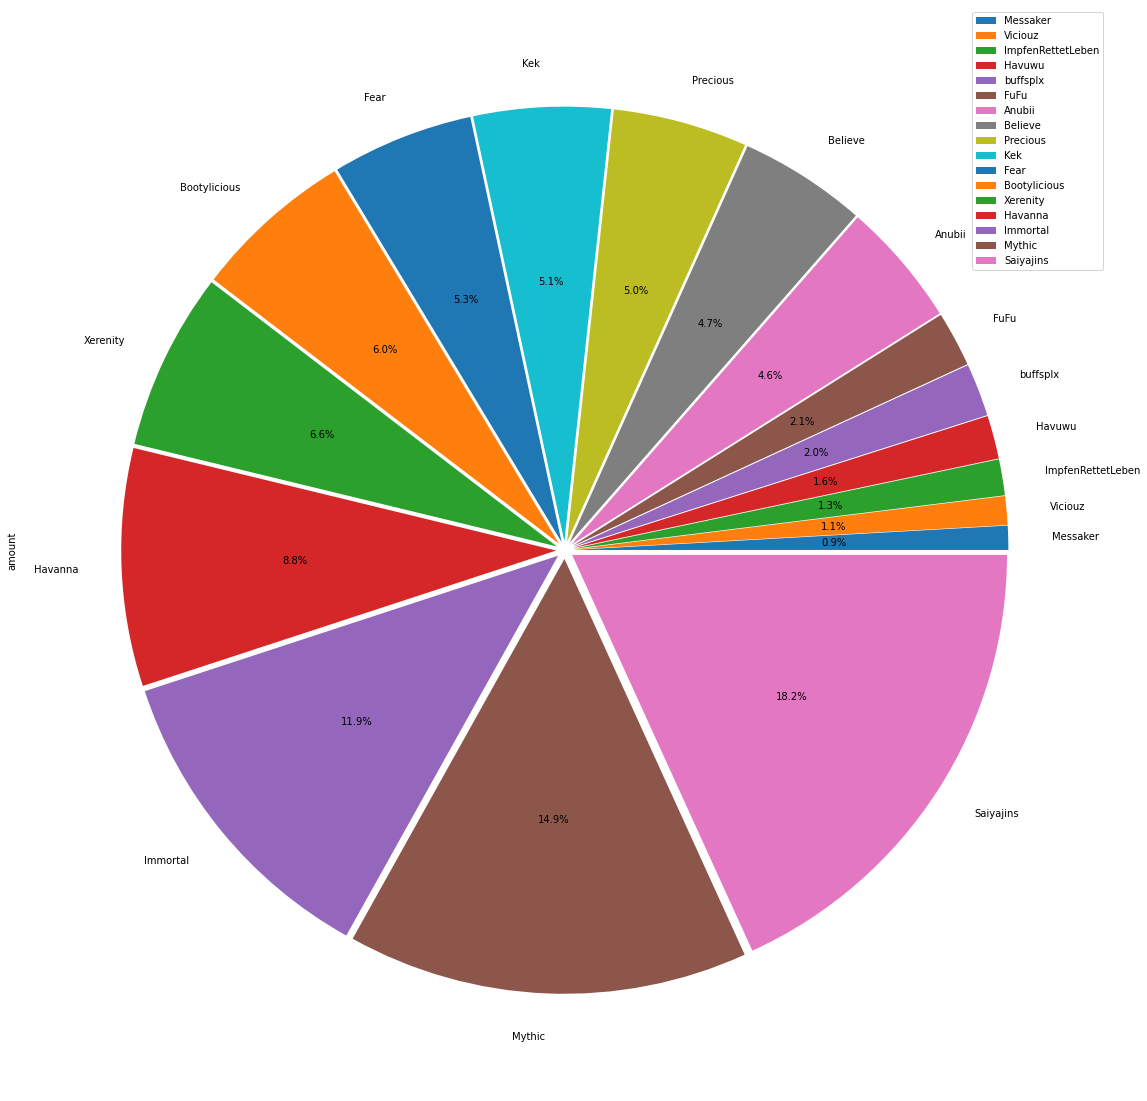

In [62]:
killingguild_df = df.groupby(['KillingGuild']).sum()
killingguild_df.sort_values(by=['amount'], inplace=True)
killingguild_df.plot.pie(y = 'amount', figsize=(20,20), autopct='%1.1f%%', explode = [0.02 for _ in range(killingguild_df.shape[0])])

<AxesSubplot:ylabel='amount'>

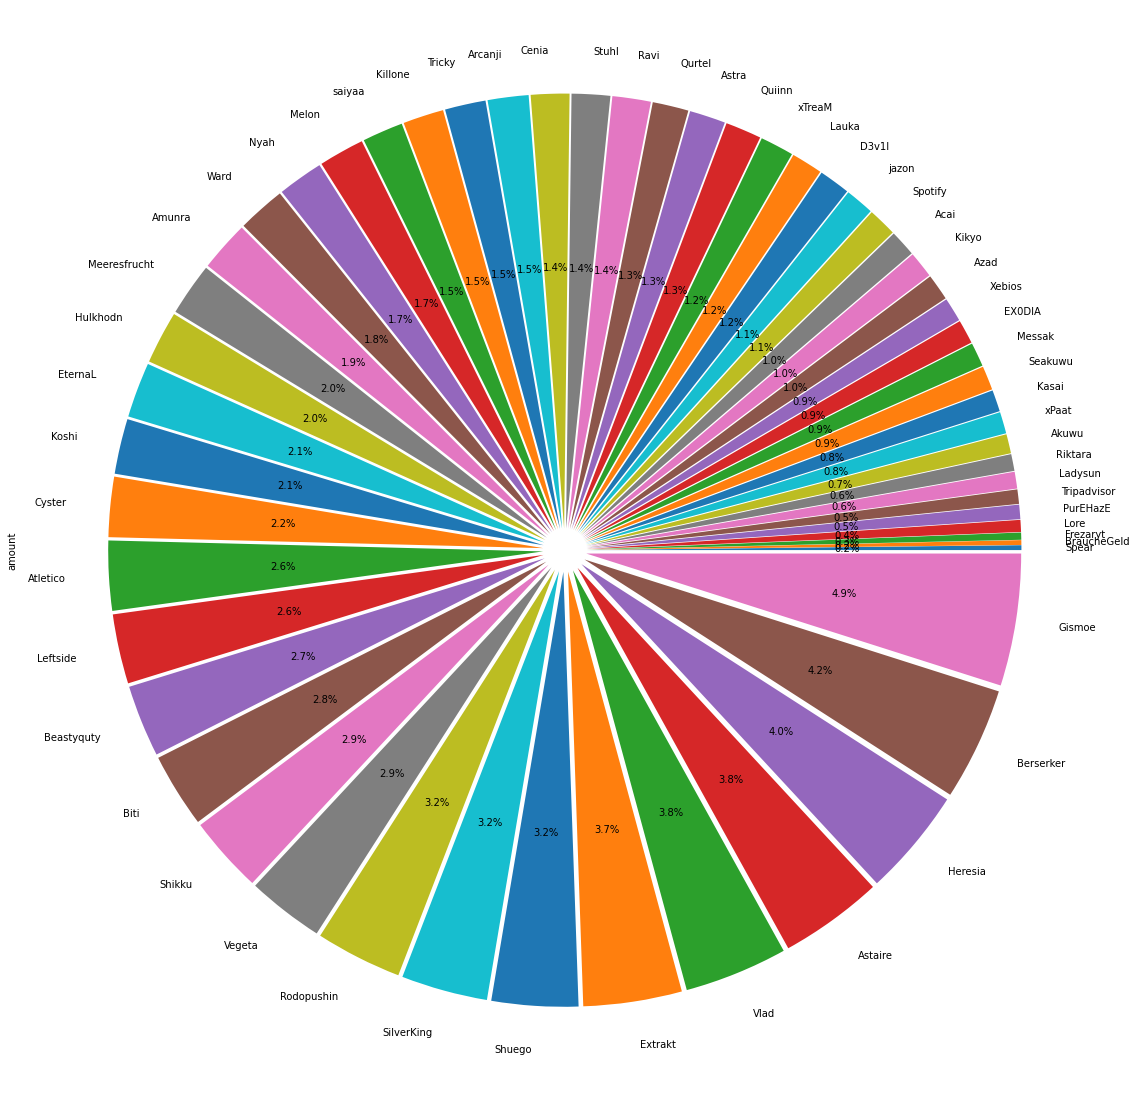

In [65]:
killingplayer_df = df.groupby(['KillingPlayer']).sum()
killingplayer_df.sort_values(by=['amount'], inplace=True)
killingplayer_df.plot.pie(y = 'amount', figsize=(20,20), autopct='%1.1f%%', explode = [0.05 for _ in range(killingplayer_df.shape[0])], legend = False)

In [83]:
killingplayer_df
ranking = killingplayer_df.amount.unique()
#ranking[killingplayer_df.at['D3v1l', 'amount']]
#Rank = [index for (index, item) in ranking if item == killingplayer_df.at('D3v1l', 'amount')]
killingplayer_df.at['D3v1l', 'amount']
Rank = [index for (index, item) in ranking]
Rank

TypeError: cannot unpack non-iterable numpy.int64 object